<a href="https://colab.research.google.com/github/AmitS1009/ML_Projects/blob/main/Stock_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install pandas-datareader

In [3]:
import pandas_datareader as data

In [ ]:
!pip install yfinance

In [4]:
import yfinance as yf

start = '2010-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440330,6.455075,6.391277,6.422875,493729600
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2010-01-06,6.348845,6.477044,6.342225,6.451465,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500


In [7]:
df.reset_index(inplace=True)  # 'Date' ko wapas coloum


In [8]:

df = df.drop(['Date'], axis=1)  # Ab column delete kar sakte ho


<ipython-input-8-52ccec1df520>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)  # Ab column delete kar sakte ho


In [9]:
df.head(2)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440330,6.455075,6.391277,6.422875,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800


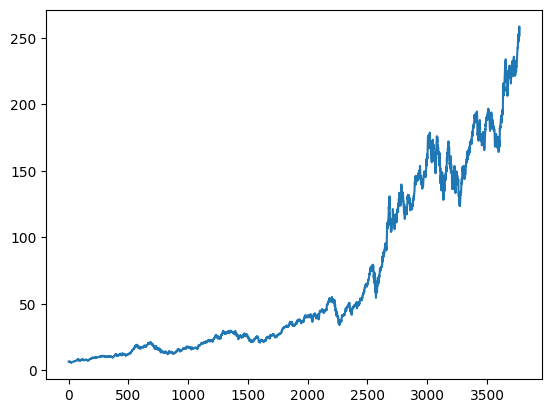

In [10]:
plt.plot(df.Close)

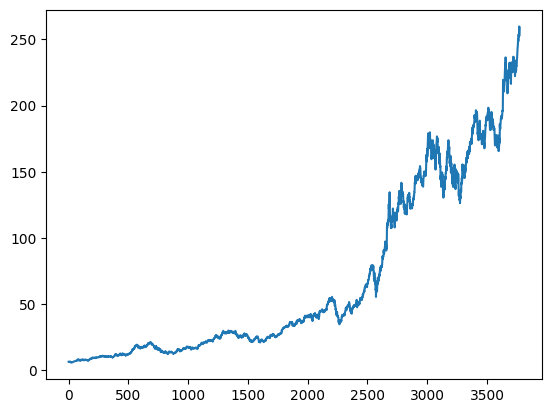

In [11]:
plt.plot(df.High
    )

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,228.969606
3769,229.357535
3770,229.859200
3771,230.346935


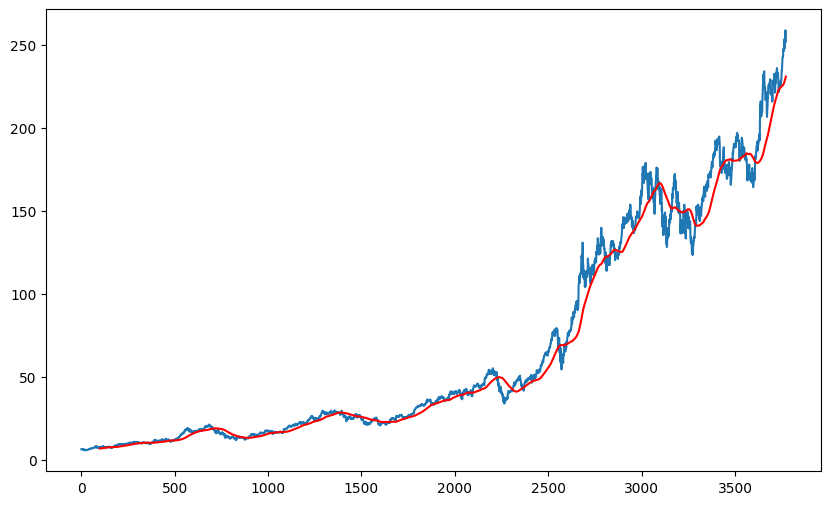

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(df.Close)

plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,210.752678
3769,211.182569
3770,211.614168
3771,212.039085


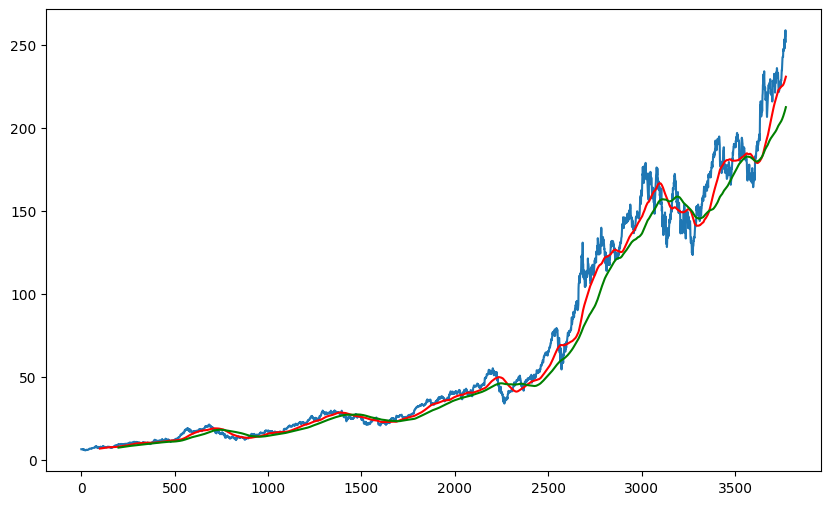

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(df.Close)

plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(3773, 5)

In [17]:
train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
test_data = pd.DataFrame(df['Close'][int(len(df)*0.75):int(len(df))])

In [18]:
train_data.shape

(2829, 1)

In [19]:
test_data.shape

(944, 1)

In [20]:
train_data.head()

Ticker,AAPL
0,6.440330
1,6.451466
2,6.348845
3,6.337110
4,6.379241


In [21]:
test_data.sample(5)

Ticker,AAPL
3160,150.732315
3549,187.962479
2954,139.266296
3305,146.997574
3033,161.680878


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [23]:
training_data = scaler.fit_transform(train_data)
training_data

array([[0.00492966],
       [0.00501273],
       [0.00424723],
       ...,
       [0.84138463],
       [0.8426981 ],
       [0.83182533]])

In [24]:
X_train = []
Y_train = []

for i in range(100, training_data.shape[0]):
    X_train.append(training_data[i-100 : i])
    Y_train.append(training_data[i : 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
!pip install tensorflow

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [27]:
model =  Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 293ms/step - loss: nan
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: nan
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: nan
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - loss: nan
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - loss: nan
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 284ms/step - loss: nan
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - loss: nan
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - loss: nan
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 289ms/step - loss: nan
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 280ms/step - loss: nan
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: nan
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: nan
Epoch 13/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: nan
Epoch 14/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: nan
Epoch 15/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: nan
Epoch 16/50
86/86 ━